Mostramos a continuación la resolución de la actividad correspondiente a la Lección 2, que consistió en la aplicación de algunas técnicas de preprocesado al "Indian Liver Patient DataSet". 

https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

# Carga del Dataset

In [31]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

filename = 'indian_liver_patient.csv'
col_names = ['age', 'gen', 'tbili', 'dbili', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'ag' ,'class']

data = pd.read_csv(filename, names = col_names)
data.head()

,age,gen,tbili,dbili,alkphos,sgpt,sgot,tp,alb,ag,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Identificado de variables susceptibles a transformación

Vamos a comenzar dibujando un histograma con cada una de las variables del DataFrame.

<IPython.core.display.Javascript object>


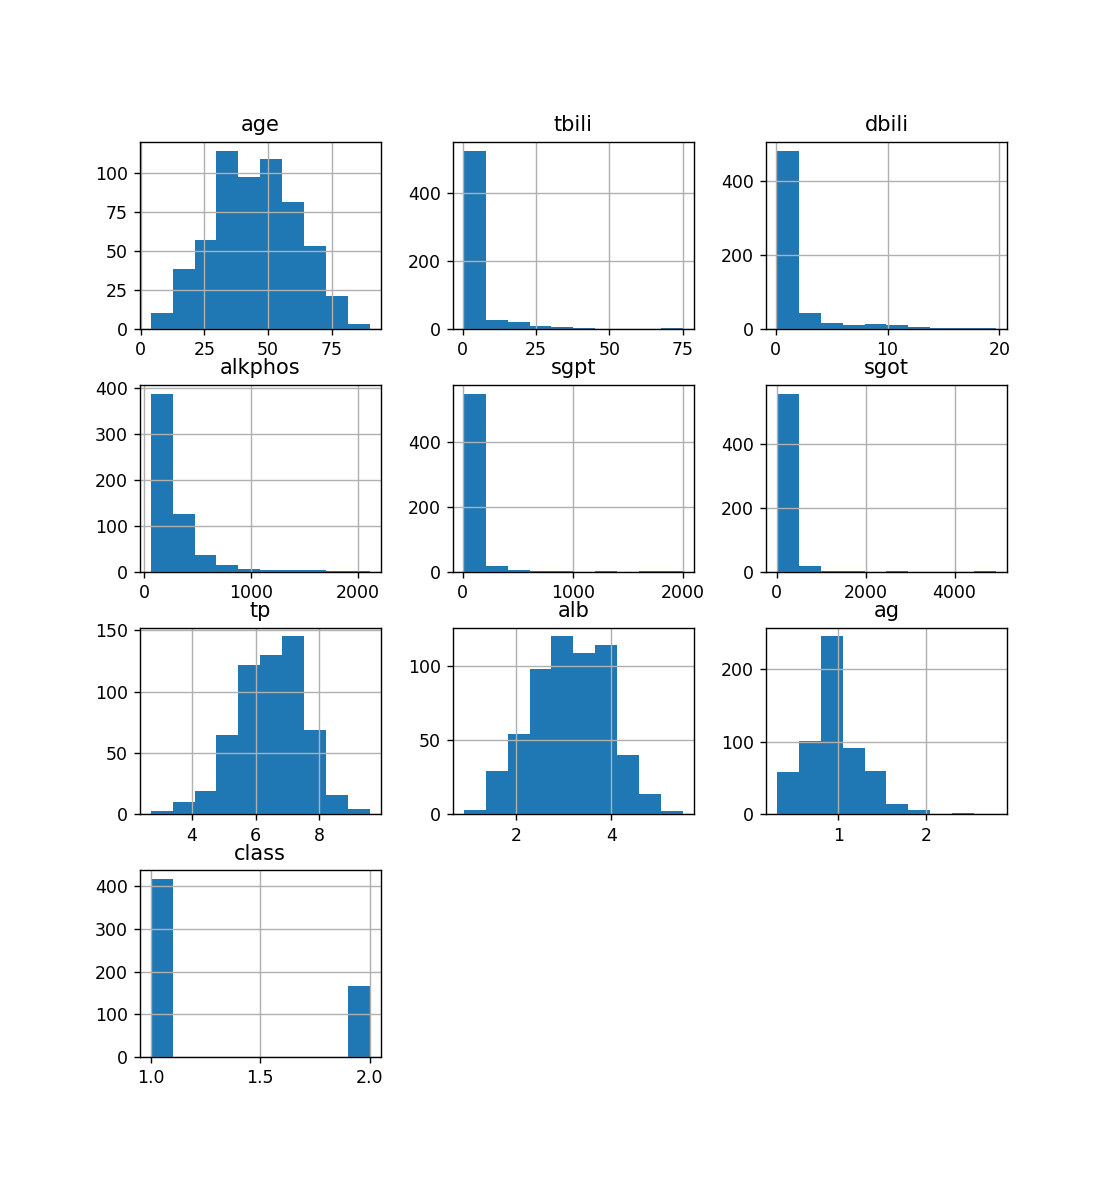

In [32]:
data.hist()
plt.show()

Del histograma anterior, vemos que algunas variables como ``age``, ``alb``, ``tp`` o ``alkphos``, podrían recibir un escalado para expresar su valor en un intervalo concreto. Para esta actividad, vamos a tomar la variable ``alkphos`` y aplicaremos las transformaciones estudiadas en sesiones de teoría.

# Transformaciones sobre la variable numérica ``alkphos``

In [33]:
# En primer lugar obtenemos la columna correspondiente a alb.
alk_data = data[['alkphos']]
alk_data.head(10)

,alkphos
0,187
1,699
2,490
3,182
4,195
5,208
6,154
7,202
8,202
9,290


## Escalado de los datos con ``MinMaxScaler``

In [34]:
alk_data = alk_data.values
min_max_sc = MinMaxScaler(feature_range = (0, 1))
min_max_sc.fit(alk_data)
res_min_max = min_max_sc.transform(alk_data)
res_min_max[:10]

array([[0.06057645],
       [0.31069858],
       [0.20859795],
       [0.05813385],
       [0.06448461],
       [0.07083537],
       [0.0444553 ],
       [0.06790425],
       [0.06790425],
       [0.11089399]])

## Estandarizado con ``StandardScaler``

In [35]:
std_scaler = StandardScaler().fit(alk_data)
res_std_scaler = std_scaler.transform(alk_data)
res_std_scaler[:10]

array([[-0.42671496],
       [ 1.68262856],
       [ 0.82158795],
       [-0.44731402],
       [-0.39375647],
       [-0.34019892],
       [-0.56266874],
       [-0.36491779],
       [-0.36491779],
       [-0.00237437]])

## Estandarizado con ``RobustScaler``

In [36]:
rob_scaler = RobustScaler().fit(alk_data)
res_rob_scaler = rob_scaler.transform(alk_data)
res_rob_scaler[:10]

array([[-0.17142857],
       [ 4.00816327],
       [ 2.30204082],
       [-0.2122449 ],
       [-0.10612245],
       [ 0.        ],
       [-0.44081633],
       [-0.04897959],
       [-0.04897959],
       [ 0.66938776]])

## Graficado de las variables 

In [37]:
# Construimos un DataFrame con todos los datos
graph_df = pd.DataFrame({'alkphos':alk_data.flatten(), 'alkphos_min_max':res_min_max.flatten(), 
                        'alkphos_std':res_std_scaler.flatten(), 'alkphos_rob':res_rob_scaler.flatten()})
graph_df.head()

,alkphos,alkphos_min_max,alkphos_std,alkphos_rob
0,187,0.060576,-0.426715,-0.171429
1,699,0.310699,1.682629,4.008163
2,490,0.208598,0.821588,2.302041
3,182,0.058134,-0.447314,-0.212245
4,195,0.064485,-0.393756,-0.106122


<IPython.core.display.Javascript object>


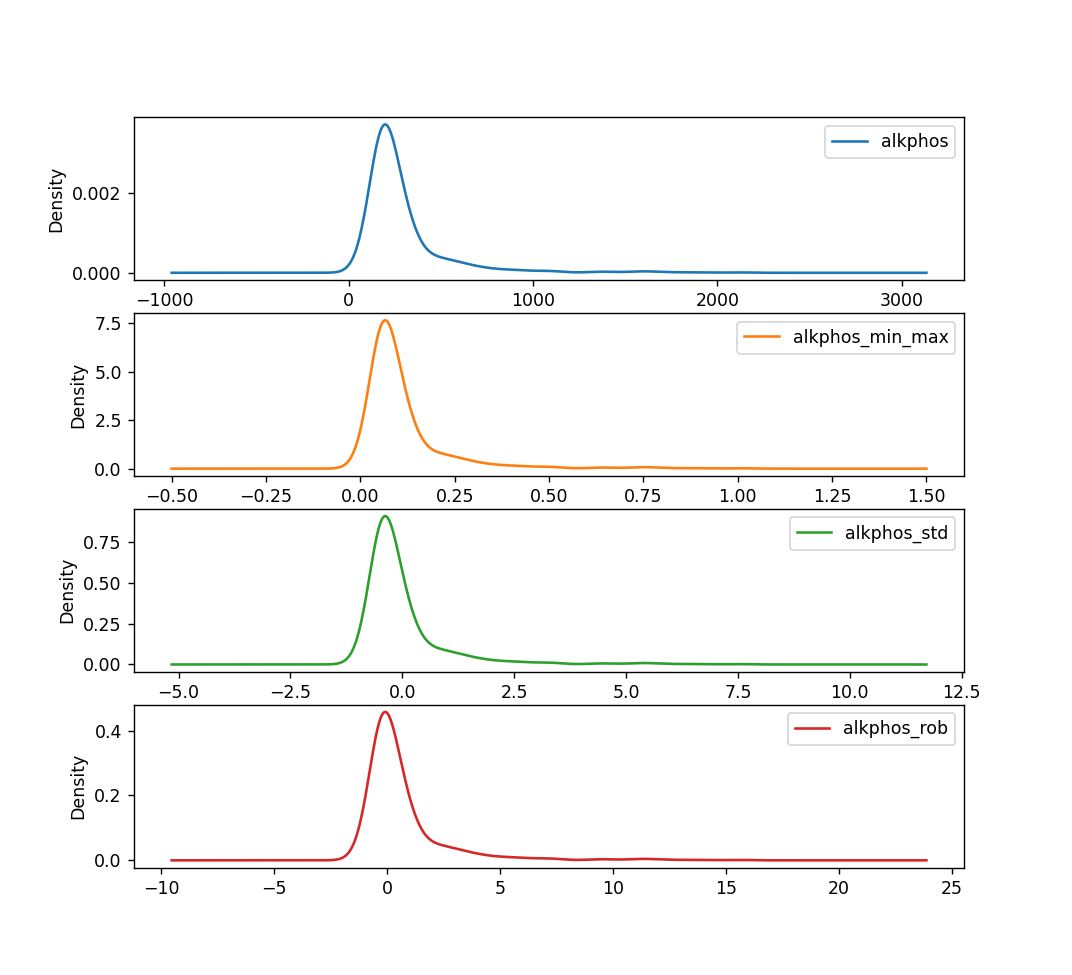

In [38]:
# Dibujamos un gráfico de densidad
graph_df.plot(kind = 'density', subplots = True, sharex = False)
plt.show()

Como podemos observar de los gráficos anteriores la distribución de los datos no varia pues simplemente hemos aplicado una misma operación a todos los valores de la variable seleccionada y los valores siguen "guardando la misma relación". En cualquier caso, este procedimiento se hace necesario en caso de usar algoritmos de ML que asuman una distribución normal de los datos de entrada, o que requieran de una optimización por descenso de gradiente.  